In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns           
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  

In [2]:
# verimizi diskten okuyalim
veri_ml = pd.read_csv('datasets/temizlenmis_veri_airbnb.csv')
veri_ml.head()

,ilce,enlem,boylam,oda_tipi,fiyat,min_gece,degerlendirme_sayisi,host_ev_sayisi,yil_ici_uygunluk
0,Besiktas,41.06984,29.04545,Entire home/apt,965,365,41,2,356
1,Beyoglu,41.03254,28.98153,Entire home/apt,289,30,10,1,0
2,Sariyer,41.09048,29.05559,Entire home/apt,1018,3,0,1,88
3,Beyoglu,41.04844,28.95254,Private room,407,3,0,1,365
4,Beyoglu,41.03350,28.97626,Private room,952,1,1,1,364


Text(0.5, 1.0, 'Fiyat Dagilimi')

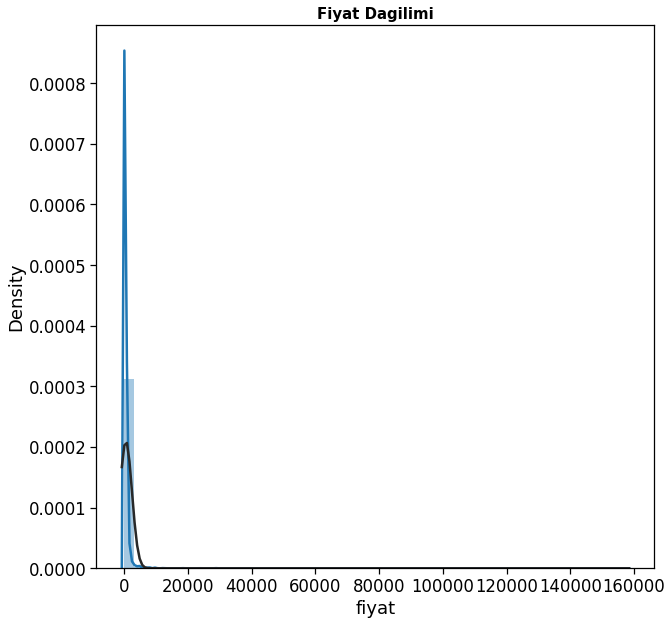

In [3]:
# goruldugu uzere cok buyuk bir dengesizlik var. Bunun nedeni ayrık degerler dedigimiz degerler.
# simdi br yayilim grafigi ile bunu gorelim.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
sns.distplot(veri_ml['fiyat'], fit=norm)
plt.title("Fiyat Dagilimi",size=15, weight='bold')

In [4]:
# Esik degerine gore fiyat belirleme
#750 üzeri fiyatları bul kaldir - 0 olani sil
drop_bigger_750 = veri_ml[veri_ml['fiyat']>750].index
veri_ml = veri_ml.drop(drop_bigger_750)
veri_ml = veri_ml.drop(veri_ml[veri_ml['fiyat'] == 0].index)

veri_ml['yeni_fiyat'] = veri_ml['fiyat']
veri_ml = veri_ml.drop(columns=['fiyat'])

Text(0.5, 1.0, 'Fiyat Dagilimi')

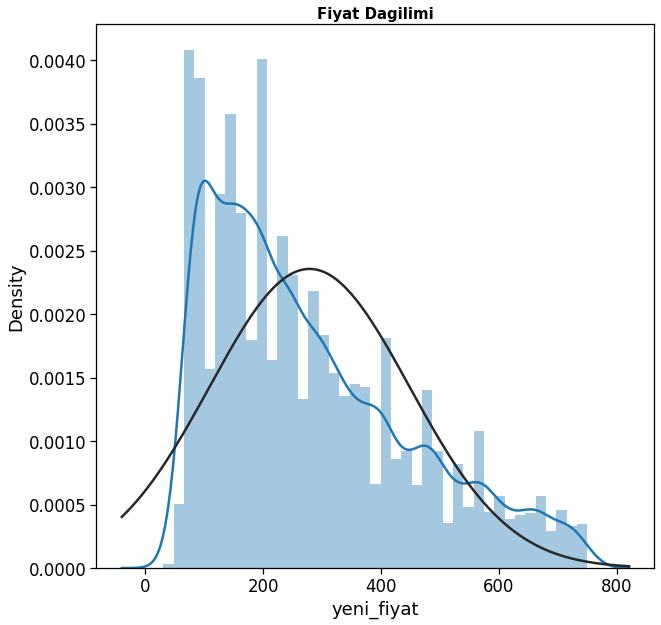

In [5]:
# dagilima ve fiyat degerlerine tekrar bakalim
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,10))
sns.distplot(veri_ml['yeni_fiyat'], fit=norm)
plt.title("Fiyat Dagilimi",size=15, weight='bold')


In [6]:
# label encoding
veri_ml['ilce'] = veri_ml['ilce'].astype("category").cat.codes
veri_ml['oda_tipi'] = veri_ml['oda_tipi'].astype("category").cat.codes
veri_ml.head()
# goruldugu gibi artik oda tiplerimiz ve ilcelerimiz alfabetik olacak siralarina gore degerler aldilar
# aritk ml adimlarina gecebiliriz

,ilce,enlem,boylam,oda_tipi,min_gece,degerlendirme_sayisi,host_ev_sayisi,yil_ici_uygunluk,yeni_fiyat
1,12,41.03254,28.98153,0,30,10,1,0,289
3,12,41.04844,28.95254,2,3,0,1,365,407
5,32,41.05382,28.99739,2,2,1,2,364,503
6,12,41.02704,28.97588,2,1,0,1,365,555
7,12,41.03658,28.97213,0,30,38,3,333,295


Text(0.5, 1.0, 'Korelasyon Matrisi')

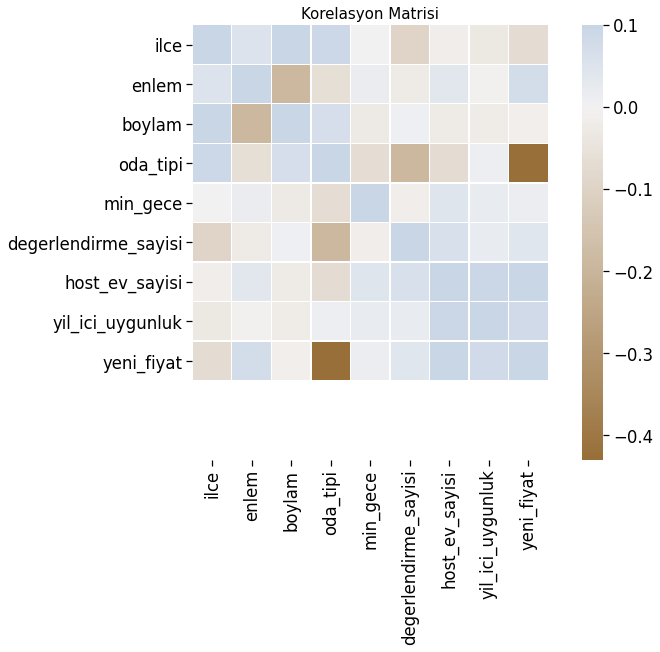

In [7]:
# verilerimiz arasindaki bagintilari kontrol etmek icin bir korelasyon matrisi kullanacagiz
# bu sayede son adimdan once yapabileceklerimiz var mi son bir kez gozden gecirmis olacagiz
plt.figure(figsize=(12,8))
palette = sns.diverging_palette(50, 250, n=256)
corr=veri_ml.corr(method='pearson')
sns.heatmap(corr, fmt=".2f", cmap=palette, vmax=.1, center=0,
            square=True, linewidths=.2).set(ylim=(11, 0))
plt.title("Korelasyon Matrisi",size=15)

# tum veriler arasinda cok buyuk farkliliklar yok, birbirlerine yakin oranlarda iliskililer 
# bu yuzden bu niteliklerle devam ediyoruz.

In [8]:
# Applying Machine Learning Steps/Algorithms

In [9]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor       
from xgboost.sklearn import XGBClassifier
import xgboost

from sklearn import metrics
from sklearn.metrics import mean_squared_error           
from sklearn.metrics import mean_absolute_error       
from math import sqrt
from sklearn.metrics import r2_score

In [10]:
# train set without labels/yeni_fiyat
model_x = veri_ml.drop(columns=['yeni_fiyat'])
# test set without features
model_y = veri_ml[['yeni_fiyat']]

In [11]:
# convert data values for training.
scaler = StandardScaler()
model_x = scaler.fit_transform(model_x)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=0.2,random_state=42)
# split data for models

In [13]:
#Regresyon modeli tanımlama ve egitimi
lineer = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lineer.fit(X_train, y_train)
linear_pred= lineer.predict(X_test)

In [14]:
#XGBoost modeli tanimlama ve egitimi
xgb = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, subsample=0.75)
xgb.fit(X_train,y_train)
xbg_pred = xgb.predict(X_test)

In [15]:
#Karar Agaci Regresyon Modeli Tanımlama
DTree=DecisionTreeRegressor(min_samples_leaf=.01,random_state=42, splitter='random')
DTree.fit(X_train,y_train)
decis_pred=DTree.predict(X_test)

In [16]:
rmse_lineer = np.sqrt(mean_squared_error(y_test, linear_pred))
mae_lineer =  mean_absolute_error(y_test, linear_pred)
r2_lineer =  r2_score(y_test, linear_pred)

rmse_xgb =  np.sqrt(mean_squared_error(y_test, xbg_pred))
mae_xgb =  mean_absolute_error(y_test, xbg_pred)
r2_xgb =  r2_score(y_test, xbg_pred)

rmse_dtree =  np.sqrt(mean_squared_error(y_test, decis_pred))
mae_dtree =  mean_absolute_error(y_test, decis_pred)
r2_dtree =  r2_score(y_test, decis_pred)

In [17]:
# convert results to see clearly and more readable
data = [{'RMSE': rmse_lineer, 'MAE': mae_lineer, 'R2':r2_lineer}, 
        {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2':r2_xgb},
       {'RMSE': rmse_dtree, 'MAE': mae_dtree, 'R2':r2_dtree}
       ]
df = pd.DataFrame(data, index =['LinearRegression', 
                                'XGBoost', 
                                'DecisionTree']) 
df.T

,LinearRegression,XGBoost,DecisionTree
RMSE,148.612006,135.617906,148.205330
MAE,118.100279,105.043127,116.767329
R2,0.225224,0.354788,0.229459


In [18]:
# How to save models into GUI folder
import pickle # to save and load models as pickle file type
filename = 'GUI/models/lineer.sav' 
pickle.dump(lineer,open(filename,'wb')) 
filename = 'GUI/models/xgb.sav' 
pickle.dump(xgb,open(filename,'wb')) 
filename = 'GUI/models/dtree.sav' 
pickle.dump(DTree,open(filename,'wb')) 

In [19]:
loaded_model = pickle.load(open(filename, 'rb')) # load the model from file - takes the last path we defined above
decis=DTree.predict(X_test) # apply prediction steps to loaded model
result = np.sqrt(mean_squared_error(y_test, decis)) # use a score metric for model success
print(result) # show the results

148.20533049589966


In [20]:
# UPDATING ... Connect GUI with the models and features - Upload GUI pics and complete comments 
# Enes Çavuş